In [13]:
import cv2
import pandas as pd
import plotly.express as px
from nncomp_molecule import constants

In [2]:
df = pd.read_csv("/work/output/1003_effnet_b5/valid_fold=0_beam=4.csv")
df.head()

,image_id,InChI,InChI_GT,score,levenshtein
0,000011a64c74,InChI=1S/C13H20OS/c1-9(2)8-15-13-6-5-10(3)7-12...,InChI=1S/C13H20OS/c1-9(2)8-15-13-6-5-10(3)7-12...,-5.960409e-07,0
1,000011a64c74,InChI=1S/C13H19OS/c1-9(2)8-15-13-6-5-10(3)7-12...,InChI=1S/C13H20OS/c1-9(2)8-15-13-6-5-10(3)7-12...,-1.951246e-01,2
2,000011a64c74,InChI=1S/C13H18OS/c1-9(2)8-15-13-6-5-10(3)7-12...,InChI=1S/C13H20OS/c1-9(2)8-15-13-6-5-10(3)7-12...,-1.994168e-01,5
3,000011a64c74,InChI=1S/C13H18OS/c1-9(2)8-15-13-6-5-10(3)7-12...,InChI=1S/C13H20OS/c1-9(2)8-15-13-6-5-10(3)7-12...,-2.005658e-01,2
4,0000252b6d2b,InChI=1S/C24H23N5O4/c1-14-13-15(7-8-17(14)27-1...,InChI=1S/C24H23N5O4/c1-14-13-15(7-8-17(14)28-1...,-1.512850e-03,6


In [4]:
idx = df.groupby("image_id").levenshtein.idxmin()
lower_df = df.loc[idx]
lower_df.levenshtein.mean()

1.7629723742775938

<AxesSubplot:>

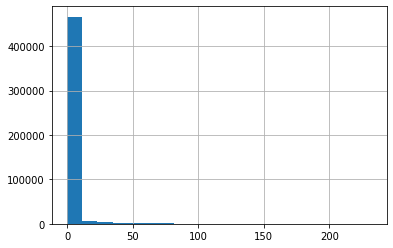

In [5]:
lower_df.levenshtein.hist(bins=20)

In [13]:
lower_df.levenshtein.value_counts(sort=False)

0      436947
1        5101
2        6118
3        3869
4        3302
        ...  
176         1
177         1
178         1
183         1
232         1
Name: levenshtein, Length: 170, dtype: int64

In [18]:
with pd.option_context("display.max_colwidth", None):
    display(lower_df.sort_values("levenshtein"))

,image_id,InChI,InChI_GT,score,levenshtein
0,000011a64c74,"InChI=1S/C13H20OS/c1-9(2)8-15-13-6-5-10(3)7-12(13)11(4)14/h5-7,9,11,14H,8H2,1-4H3","InChI=1S/C13H20OS/c1-9(2)8-15-13-6-5-10(3)7-12(13)11(4)14/h5-7,9,11,14H,8H2,1-4H3",-5.960409e-07,0
1259808,a6816c1e0776,"InChI=1S/C20H20ClN3O2/c1-13-10-17(14(2)9-16(13)21)22-20-23-19(25)18(26-3)12-24(20)11-15-7-5-4-6-8-15/h4-10,12H,11H2,1-3H3,(H,22,23,25)","InChI=1S/C20H20ClN3O2/c1-13-10-17(14(2)9-16(13)21)22-20-23-19(25)18(26-3)12-24(20)11-15-7-5-4-6-8-15/h4-10,12H,11H2,1-3H3,(H,22,23,25)",-5.559720e-04,0
1259804,a68169c545bb,"InChI=1S/C9H5BrClNO2/c10-3-5-1-6(4-12)7(9(13)14)2-8(5)11/h1-2H,3H2,(H,13,14)","InChI=1S/C9H5BrClNO2/c10-3-5-1-6(4-12)7(9(13)14)2-8(5)11/h1-2H,3H2,(H,13,14)",-1.692058e-05,0
1259800,a6816869fcc0,"InChI=1S/C15H16ClNO2S/c1-2-11-8-12(5-6-14(11)16)19-10-15(18)17-9-13-4-3-7-20-13/h3-8H,2,9-10H2,1H3,(H,17,18)","InChI=1S/C15H16ClNO2S/c1-2-11-8-12(5-6-14(11)16)19-10-15(18)17-9-13-4-3-7-20-13/h3-8H,2,9-10H2,1H3,(H,17,18)",-7.384663e-04,0
1259796,a6816845c6a5,"InChI=1S/C21H18ClN5O2S/c22-17-4-6-18(7-5-17)29-11-20-26-19(12-30-20)21(28)24-9-15-2-1-3-16(8-15)10-27-14-23-13-25-27/h1-8,12-14H,9-11H2,(H,24,28)","InChI=1S/C21H18ClN5O2S/c22-17-4-6-18(7-5-17)29-11-20-26-19(12-30-20)21(28)24-9-15-2-1-3-16(8-15)10-27-14-23-13-25-27/h1-8,12-14H,9-11H2,(H,24,28)",-1.383642e-04,0
...,...,...,...,...,...
1477825,c33f77426ef5,"InChI=1S/C58H117N15/c1-2-3-4-5-6-7-8-9-10-11-12-13-14-15-16-17-18-19-20-21-22-23-24-25-26-27-28-31-34-37-40-43-46-50-58(63)64-53-56(65)59-66-54-51-47-44-41-38-35-32-29-30-33-36-39-45-48-55-66-59(61)62-54-53-50-47-42-39-40-41-38-37-36-38-39-40-42-49-55/h59-60H,2-55H2,1H3,(H,59,60)(H,61,62)","InChI=1S/C62H156N30/c1-3-4-64-7-8-66-11-12-68-15-16-70-19-20-72-23-24-74-27-28-76-31-32-78-35-36-80-39-40-82-43-44-84-47-48-86-51-52-88-55-56-90-59-60-92-62-61-91-58-57-89-54-53-87-50-49-85-46-45-83-42-41-81-38-37-79-34-33-77-30-29-75-26-25-73-22-21-71-18-17-69-14-13-67-10-9-65-6-5-63-2/h63-92H,3-62H2,1-2H3",-3.597671e-01,176
712216,5e0c7d9e41d5,"InChI=1S/C55H94O11/c1-4-7-10-13-16-21-24-27-30-33-36-39-42-48(57)60-45-49(63-52(58)43-40-37-34-31-28-25-22-19-17-14-11-8-5-2)47-62-50(56)44-41-38-35-32-29-26-23-20-18-15-12-9-6-3/h18,21,25-26,33,35,50-51,54H,4-17,19-20,22-24,27-32,34,36-47H2,1-3H3/b21-18+,28-25+,29-26+,35-33+","InChI=1S/C61H114O10/c1-7-11-14-16-26-35-43-55(62)52(5)41-33-24-22-30-38-47-59(65)69-50-54(51-70-60(66)48-39-31-23-25-34-42-53(6)56(63)44-36-27-17-15-12-8-2)71-61(67)49-40-29-21-19-18-20-28-37-45-57(64)58(68-10-4)46-32-13-9-3/h26,28,35,37,52-58,62-64H,7-25,27,29-34,36,38-51H2,1-6H3/b35-26+,37-28+",-1.968023e-01,177
1627897,d702d93cc364,"InChI=1S/C69H133NO5/c1-3-5-7-9-11-13-15-17-18-19-20-21-22-23-24-25-26-29-32-35-39-43-47-51-55-59-63-69(74)68(67-73)72-70(75)64-60-56-52-48-44-40-36-33-30-27-28-31-34-38-42-46-50-54-58-62-66-77-71(76)65-61-57-53-49-45-41-37-16-14-12-10-8-6-4-2/h24,26,60,64,69-70,74-75H,3-23,25,27-55,57-59,61-64H2,1-2H3,(H,70,73)/b26-24-,60-56+","InChI=1S/C79H156O4/c1-6-8-10-12-14-16-18-20-22-24-25-37-40-44-48-52-56-60-64-68-72-76(79(81)83-5)77(80)73-69-65-61-57-53-49-45-41-38-35-33-31-29-27-26-28-30-32-34-36-39-42-46-50-54-58-62-66-70-74-78(82-4)75(3)71-67-63-59-55-51-47-43-23-21-19-17-15-13-11-9-7-2/h34,36,75-78,80H,6-33,35,37-74H2,1-5H3/b36-34-",-5.430718e-02,178
391008,33c91c2956cf,InChI=1S/CH1N/c1-3-4-5-6-7-8-9-10-11-12-13-14-15-16-17-18-19-20-21-22-23-24-25-26-27-28-29-30-31-32-33-34-35-36-37-38-39-40-41-42-43-44-45-46-47-48-49-50-51-52-54-57-58-61-67-68(81)70-73-80-81-78(82)79-80-81-75(80)69-65-62-59-56-53-49-19-2/h1-60H2,"InChI=1S/C19H4O/c1-2-3-4-5-6-7-8-9-10-11-12-13-14-15-16-17-18-19-20/h1,20H,19H2",-2.693424e-01,183


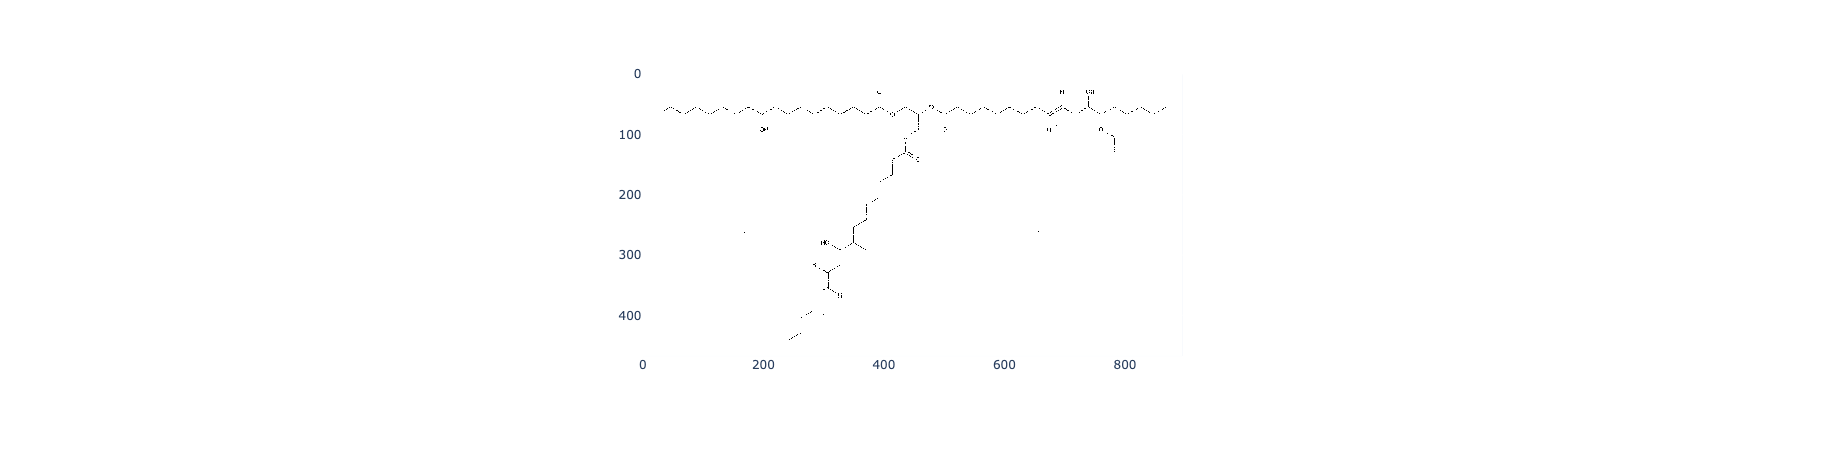

In [30]:
image_id = "5e0c7d9e41d5"
datadir = constants.COMPETITION_DATADIR / "train"
image_path = datadir / "/".join(image_id[:3]) / f"{image_id}.png"
px.imshow(cv2.imread(str(image_path)))

<AxesSubplot:xlabel='score', ylabel='levenshtein'>

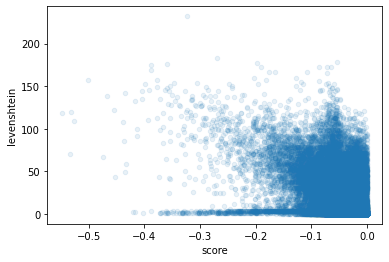

In [20]:
lower_df.plot.scatter("score", "levenshtein", alpha=.1)

In [17]:
lower_df.plot.scatter?

Signature: lower_df.plot.scatter(x, y, s=None, c=None, **kwargs)
Docstring:
Create a scatter plot with varying marker point size and color.

The coordinates of each point are defined by two dataframe columns and
filled circles are used to represent each point. This kind of plot is
useful to see complex correlations between two variables. Points could
be for instance natural 2D coordinates like longitude and latitude in
a map or, in general, any pair of metrics that can be plotted against
each other.

Parameters
----------
x : int or str
    The column name or column position to be used as horizontal
    coordinates for each point.
y : int or str
    The column name or column position to be used as vertical
    coordinates for each point.
s : str, scalar or array_like, optional
    The size of each point. Possible values are:

    - A string with the name of the column to be used for marker's size.

    - A single scalar so all points have the same size.

    - A sequence of scalars, wh